In [279]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [253]:
df = pd.read_csv("ЦУР1.csv", decimal=',')

In [254]:
df

,ЦУР,Субъект РФ,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1.2.2,РФ,"13,2","12,9","12,6","12,3","12,1","11,","9,8",NaN,NaN
1,1.2.2,ЮФО,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.2.2,РО,"14,2","13,9","13,2","13,3","13,","12,","10,5",NaN,NaN
3,1.3.1,РФ,230 710,299 752,308 815,326 293,604 856,980 845,909 426,NaN,NaN
4,1.3.1,Республика Адыгея (Адыгея),"139,","112,","118,","128,","143,",NaN,"2715,",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
65,"Реальный размер назначенных месячных пенсий, в...",РО,"141,62","105,6","101,","103,9","100,3","98,5","101,5",NaN,NaN
66,Величина прожиточного минимума РО: Все население,РО,"9565,","9667,","9675,","10337,","10793,","11053,","13085,",NaN,NaN
67,Величина прожиточного минимума РО: Трудоспособ...,РО,"10170,","10280,","10282,","11013,","11481,","11753,","14263,",NaN,NaN
68,Величина прожиточного минимума РО: Пенсионеры,РО,"7753,","7832,","7843,","8384,","8722,","9445,","11253,",NaN,NaN


In [255]:
df.drop(["2023", "2024"], axis=1, inplace=True)

In [256]:
df.set_index("ЦУР", inplace=True)

In [257]:
numeric_columns = df.columns[1:]
numeric_columns

Index(['2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='object')

In [258]:
for num_col in numeric_columns:
    df[num_col] = df[num_col].str.replace(",", ".")
    df[num_col] = df[num_col].str.replace(" ", "")

In [259]:
df

,Субъект РФ,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,,
1.2.2,РФ,13.2,12.9,12.6,12.3,12.1,11.,9.8
1.2.2,ЮФО,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.2.2,РО,14.2,13.9,13.2,13.3,13.,12.,10.5
1.3.1,РФ,230710,299752,308815,326293,604856,980845,909426
1.3.1,Республика Адыгея (Адыгея),139.,112.,118.,128.,143.,NaN,2715.
...,...,...,...,...,...,...,...,...
"Реальный размер назначенных месячных пенсий, в % к соответствующему периоду предыдущего года (данные на 1 января года следующего за отчетным)",РО,141.62,105.6,101.,103.9,100.3,98.5,101.5
Величина прожиточного минимума РО: Все население,РО,9565.,9667.,9675.,10337.,10793.,11053.,13085.
Величина прожиточного минимума РО: Трудоспособное население,РО,10170.,10280.,10282.,11013.,11481.,11753.,14263.


In [260]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

### Ростовская область

In [261]:
df_ro = df[df["Субъект РФ"] == "РО"]
df_ro.head()

,Субъект РФ,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,,
1.2.2,РО,14.2,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,РО,2241.0,2029.0,4905.0,8689.0,6921.00,NaN,23687.00
1.4.1,РО,61.2,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,РО,6227.1,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,РО,135.0,648.0,50.0,61.0,281.00,235.00,NaN


In [262]:
df_ro.drop("Субъект РФ", axis=1, inplace=True)

C:\Users\yxtag\AppData\Local\Temp\ipykernel_16232\3480877717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro.drop("Субъект РФ", axis=1, inplace=True)


#### Пропуски

In [263]:
nan_rows = df_ro[df_ro.isna().any(axis=1)]

In [264]:
nan_rows

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.3.1,2241.0,2029.0,4905.0,8689.0,6921.0,NaN,23687.00
1.5.1 Пострадавшие,135.0,648.0,50.0,61.0,281.0,235.0,NaN
1.5.1 Погибшие,77.0,12.0,21.0,20.0,15.0,30.0,NaN
1.5.2,61340.0,3819811.8,NaN,51276.0,451548.0,16227.0,4027.89


In [265]:
nan_rows

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.3.1,2241.0,2029.0,4905.0,8689.0,6921.0,NaN,23687.00
1.5.1 Пострадавшие,135.0,648.0,50.0,61.0,281.0,235.0,NaN
1.5.1 Погибшие,77.0,12.0,21.0,20.0,15.0,30.0,NaN
1.5.2,61340.0,3819811.8,NaN,51276.0,451548.0,16227.0,4027.89


Заполним предыдущим значением

In [266]:
df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].fillna(method="ffill", axis=1)

C:\Users\yxtag\AppData\Local\Temp\ipykernel_16232\2985577238.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].fillna(method="ffill", axis=1)
C:\Users\yxtag\AppData\Local\Temp\ipykernel_16232\2985577238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].fillna(method="ffill", axis=1)


In [267]:
df_ro

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.2.2,14.20,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,2241.00,2029.0,4905.0,8689.0,6921.00,6921.00,23687.00
1.4.1,61.20,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,6227.10,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,135.00,648.0,50.0,61.0,281.00,235.00,235.00
1.5.1 Погибшие,77.00,12.0,21.0,20.0,15.00,30.00,30.00
1.5.2,61340.00,3819811.8,3819811.8,51276.0,451548.00,16227.00,4027.89
1.а.1,10.10,11.4,9.7,9.6,10.10,9.30,10.10
1.а.2 Образование,23.40,24.1,27.4,24.5,22.50,21.80,22.30


#### Нормализация

Приводим каждую строку к нормальному распределению (E=0 D=1)

In [272]:
scaler = StandardScaler()

In [273]:
scaled_rows = []
for i in range(df_ro.shape[0]):
    row = df_ro.iloc[i]
    scaled_row = scaler.fit_transform(row.values.reshape(-1, 1))
    scaled_rows.append([el[0] for el in scaled_row.tolist()])

# Convert the scaled rows back to a DataFrame
scaled_df_ro = pd.DataFrame(scaled_rows, columns=df_ro.columns)

In [274]:
scaled_df_ro.set_index(df_ro.index)

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.2.2,1.139583,0.882258,0.281832,0.367607,0.110282,-0.747468,-2.034094
1.3.1,-0.829622,-0.860629,-0.439988,0.113455,-0.145131,-0.145131,2.307045
1.4.1,-1.374250,-0.906894,-0.569359,0.261497,0.123887,0.583454,1.881665
1.4.2,-1.397150,-0.909256,0.044354,0.709664,-0.325262,-0.022177,1.899828
1.5.1 Пострадавшие,-0.532154,2.197795,-0.984484,-0.925947,0.244791,0.000000,0.000000
1.5.1 Погибшие,2.330031,-0.844113,-0.404616,-0.453449,-0.697614,0.034881,0.034881
1.5.2,-0.663255,1.575428,1.575428,-0.669250,-0.430833,-0.690126,-0.697392
1.а.1,0.091718,2.178303,-0.550308,-0.710815,0.091718,-1.192334,0.091718
1.а.2 Образование,-0.178962,0.219636,2.098740,0.447406,-0.691445,-1.090043,-0.805331


#### Матрица корреляций

In [278]:
scaled_df_ro.T.corr()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.000000,-0.912469,-0.954351,-0.857816,0.105963,0.207979,0.388426,0.332105,0.446062,0.285613,...,-0.964426,-0.432690,0.999999,-0.989527,-0.900284,0.528730,-0.959124,-0.956094,-0.972757,-0.963311
1,-0.912469,1.000000,0.919888,0.919436,-0.165345,-0.129049,-0.431563,-0.202570,-0.358943,-0.380398,...,0.922836,0.182341,-0.911914,0.911081,0.796953,-0.361794,0.952425,0.961313,0.936333,0.928300
2,-0.954351,0.919888,1.000000,0.918080,-0.130448,-0.332167,-0.479650,-0.355116,-0.466886,-0.340528,...,0.911903,0.422012,-0.954423,0.977763,0.833709,-0.606245,0.953974,0.947406,0.946455,0.956149
3,-0.857816,0.919436,0.918080,1.000000,-0.290751,-0.362176,-0.297193,-0.352396,-0.117141,-0.399142,...,0.810914,0.459142,-0.857624,0.856403,0.770856,-0.583996,0.832962,0.837405,0.816935,0.811415
4,0.105963,-0.165345,-0.130448,-0.290751,1.000000,-0.349669,0.396952,0.851579,-0.295966,-0.665294,...,0.106188,-0.043794,0.106227,-0.090775,-0.091927,-0.145511,-0.037009,-0.035151,-0.032063,-0.031084
5,0.207979,-0.129049,-0.332167,-0.362176,-0.349669,1.000000,-0.422437,-0.168917,-0.176885,0.576941,...,-0.234444,-0.581771,0.208542,-0.214815,-0.046329,0.910448,-0.144222,-0.132505,-0.108178,-0.157302
6,0.388426,-0.431563,-0.479650,-0.297193,0.396952,-0.422437,1.000000,0.528436,0.726215,-0.339556,...,-0.295201,0.248244,0.388539,-0.481727,-0.364236,-0.202188,-0.520180,-0.506251,-0.511708,-0.532953
7,0.332105,-0.202570,-0.355116,-0.352396,0.851579,-0.168917,0.528436,1.000000,0.021637,-0.637227,...,-0.075776,-0.364224,0.333047,-0.343414,-0.335617,0.148390,-0.214079,-0.194209,-0.236578,-0.242690
8,0.446062,-0.358943,-0.466886,-0.117141,-0.295966,-0.176885,0.726215,0.021637,1.000000,0.050220,...,-0.479709,0.181569,0.446186,-0.533659,-0.405256,-0.021835,-0.583905,-0.566848,-0.592755,-0.614272
9,0.285613,-0.380398,-0.340528,-0.399142,-0.665294,0.576941,-0.339556,-0.637227,0.050220,1.000000,...,-0.462680,-0.274590,0.284960,-0.291737,-0.328286,0.443274,-0.330280,-0.345787,-0.319254,-0.296310


<Axes: >

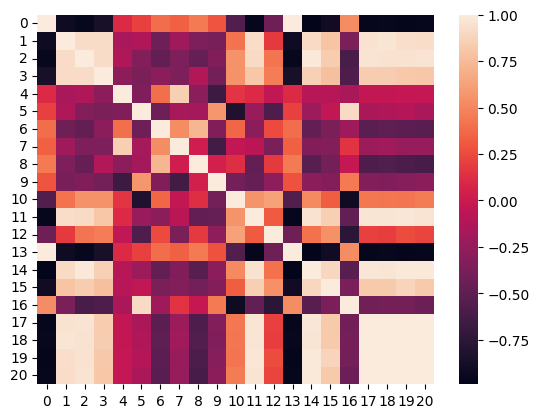

In [281]:
sns.heatmap(scaled_df_ro.T.corr())